# IJCAI 2018

In [1]:
! pip install semanticscholar

In [3]:
# helper functions for ML/AI applied to literature review
def getInfo(suffix, start, end, key) :
    """
    Get AI2 Semantic Scholar article info
    Inputs
        suffix: string, DOI suffix
        start: integer, first paper index
        end: integer, last paper index
        key: dictionary key
    Examples:
    # SAFECOMP 2020 get all 31 abstracts
    text = getInfo('10.1007/978-3-030-55583-2_', 1, 31, 'abstract')
    all keys:
    'abstract', 'arxivId', 'authors', 'citationVelocity', 'citations', 'corpusId', 'doi', 'fieldsOfStudy',
    'influentialCitationCount', 'isOpenAccess', 'isPublisherLicensed', 'is_open_access', 'is_publisher_licensed',
    'numCitedBy', 'numCiting', 'paperId', 'references', 'title', 'topics', 'url', 'venue', 'year'
    """
    import time
    import semanticscholar as sch 
    text = ''
    for i in range (start,end+1) :
        doi = suffix + str(i)
        paper = sch.paper(doi, timeout=2)
        if key in paper :
            text = text + paper[key] + ' '
        else :
            print('No {} for paper index {}'.format(key, i))
            print("DOI entry: ", doi)
        time.sleep(3)
    return text

def getAllInfo(suffix, start, end) :
    """
    Get AI2/DOI Semantic Scholar complete article info
    Inputs
        suffix: string, DOI suffix
        start: integer, first paper index
        end: integer, last paper index
    Examples:
    Output
        papers: list of dictionaries
        
    # SAFECOMP 2020 get all 31 papers
    text = getInfo('10.1007/978-3-030-55583-2_', 1, 31, 'abstract')  
    all keys:
    'abstract', 'arxivId', 'authors', 'citationVelocity', 'citations', 'corpusId', 'doi', 'fieldsOfStudy', 
    'influentialCitationCount', 'isOpenAccess', 'isPublisherLicensed', 'is_open_access', 'is_publisher_licensed', 
    'numCitedBy', 'numCiting', 'paperId', 'references', 'title', 'topics', 'url', 'venue', 'year'
    """
    import time
    import semanticscholar as sch 
    papers = []
    for i in range (start,end+1) :
        doi = suffix + str(i)
        paper = sch.paper(doi, timeout=2)
        if 'abstract' in paper :
            print('Found paper DOI:', doi)
            papers.append(paper)
        else :
            print('No abstract for paper index {}'.format(i))
            print("DOI entry: ", doi)
        time.sleep(3)
    return papers

def wcloud(text, fsize=40) :
    """
    Plot word cloud
    Input
        text: string - space delimited text
        fseize: int - font size
    Ouput
        None
    Example:
    # SAFECOMP 2020
    suffix = '10.1007/978-3-030-55583-2_'
    start = 1
    end = 31
    key = 'title'
    text = getInfo('10.1007/978-3-030-55583-2_', start, end, key) 
    wcloud(text)
    Note
        This can be customised, we have here one display possibility
    """
    from wordcloud import WordCloud
    import matplotlib.pyplot as plt
    
    # Generate a word cloud image
    wordcloud = WordCloud(max_font_size=fsize).generate(text)

    plt.figure(figsize=(25,15))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

    # lower max_font_size
    #wordcloud = WordCloud(max_font_size=40).generate(text)
    #plt.figure(figsize=(25,15))
    #plt.imshow(wordcloud, interpolation="bilinear")
    #plt.axis("off")
    plt.show()

In [4]:
# IJCAI 2018 DOI suffix, we need to do it from 1 to 870
# first
# https://doi.org/10.24963/ijcai.2018/1 
# last
# https://doi.org/10.24963/ijcai.2018/870 
suffix = '10.24963/ijcai.2018/'
# ALL INFO
start = 1
end = 870
IJCAI2018papers = getAllInfo(suffix, start, end)

Found paper DOI: 10.24963/ijcai.2018/1
Found paper DOI: 10.24963/ijcai.2018/2
Found paper DOI: 10.24963/ijcai.2018/3
Found paper DOI: 10.24963/ijcai.2018/4
Found paper DOI: 10.24963/ijcai.2018/5
Found paper DOI: 10.24963/ijcai.2018/6
Found paper DOI: 10.24963/ijcai.2018/7
Found paper DOI: 10.24963/ijcai.2018/8
Found paper DOI: 10.24963/ijcai.2018/9
Found paper DOI: 10.24963/ijcai.2018/10
Found paper DOI: 10.24963/ijcai.2018/11
Found paper DOI: 10.24963/ijcai.2018/12
Found paper DOI: 10.24963/ijcai.2018/13
Found paper DOI: 10.24963/ijcai.2018/14
Found paper DOI: 10.24963/ijcai.2018/15
Found paper DOI: 10.24963/ijcai.2018/16
Found paper DOI: 10.24963/ijcai.2018/17
Found paper DOI: 10.24963/ijcai.2018/18
Found paper DOI: 10.24963/ijcai.2018/19
Found paper DOI: 10.24963/ijcai.2018/20
Found paper DOI: 10.24963/ijcai.2018/21
Found paper DOI: 10.24963/ijcai.2018/22
Found paper DOI: 10.24963/ijcai.2018/23
Found paper DOI: 10.24963/ijcai.2018/24
Found paper DOI: 10.24963/ijcai.2018/25
Found pap

In [6]:
# save
import json
with open('IJCAI2018papers.json', 'w') as f:
    json.dump(IJCAI2018papers, f)

In [7]:
# download
from google.colab import files
files.download('IJCAI2018papers.json') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Word Clouds
## Titles (font size: 40)

Number of articles:  868


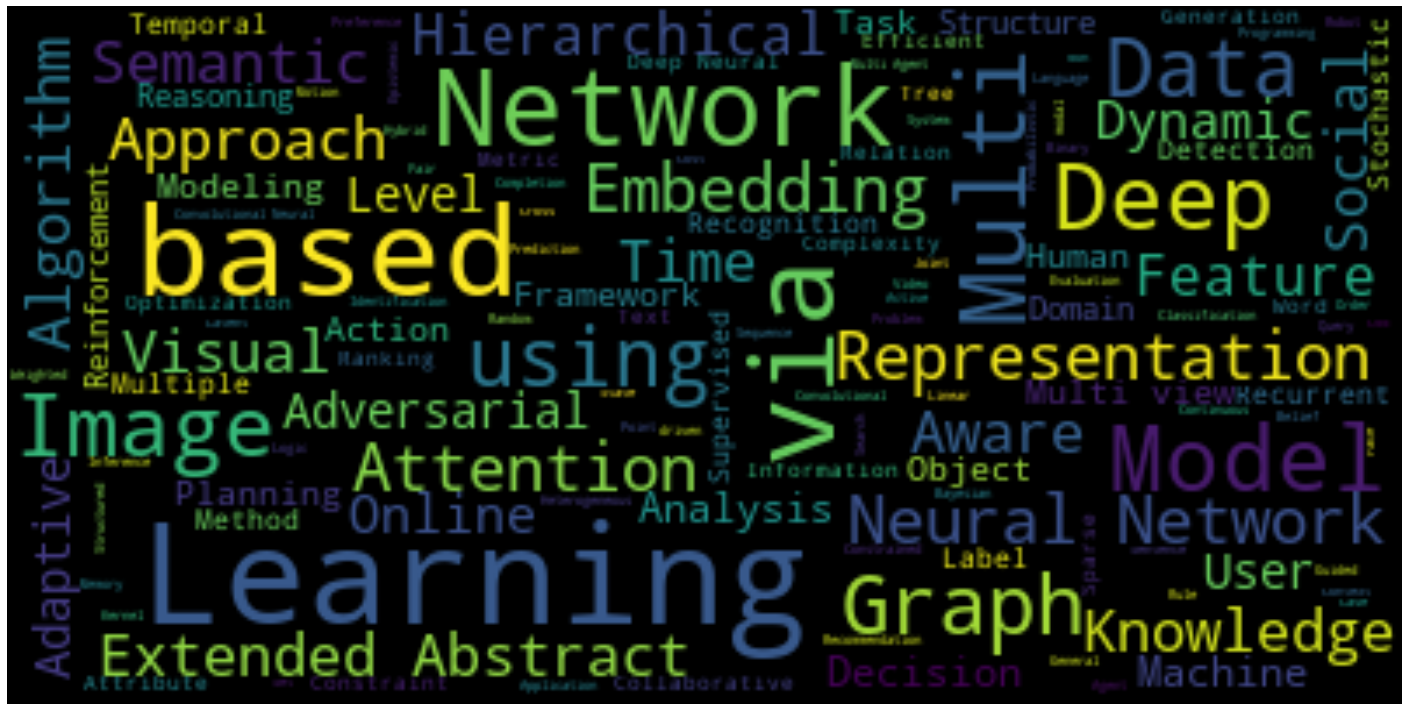

In [8]:
# word cloud titles
print("Number of articles: ", len(IJCAI2018papers))
text = ''
for i in range(0, len(IJCAI2018papers)) :
    text += IJCAI2018papers[i]['title']
wcloud(text)

## Titles (font size: 35)

Number of articles:  868


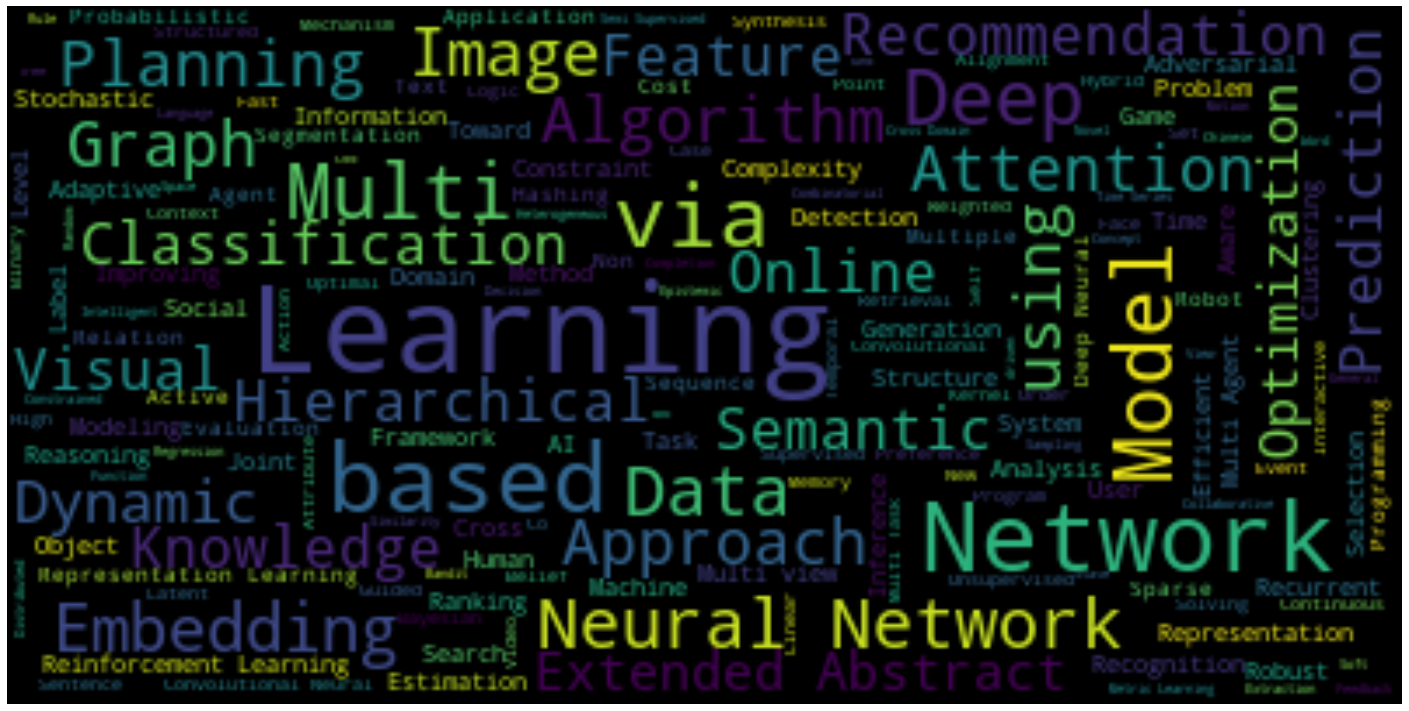

In [26]:
# word cloud titles
import re
print("Number of articles: ", len(IJCAI2018papers))
text = ''
for i in range(0, len(IJCAI2018papers)) :
    line = IJCAI2018papers[i]['title']
    # remove punctuation and newline characters
    text += re.sub('[.\\n,]', '', line) + ' '    
wcloud(text, 35)

## IJCAI 2018 Abstract Word Cloud

No abstract found for index:  34
No abstract found for index:  321
No abstract found for index:  369
No abstract found for index:  512
No abstract found for index:  622
No abstract found for index:  726
No abstract found for index:  730
No abstract found for index:  747
No abstract found for index:  753
No abstract found for index:  776
No abstract found for index:  806
No abstract found for index:  821


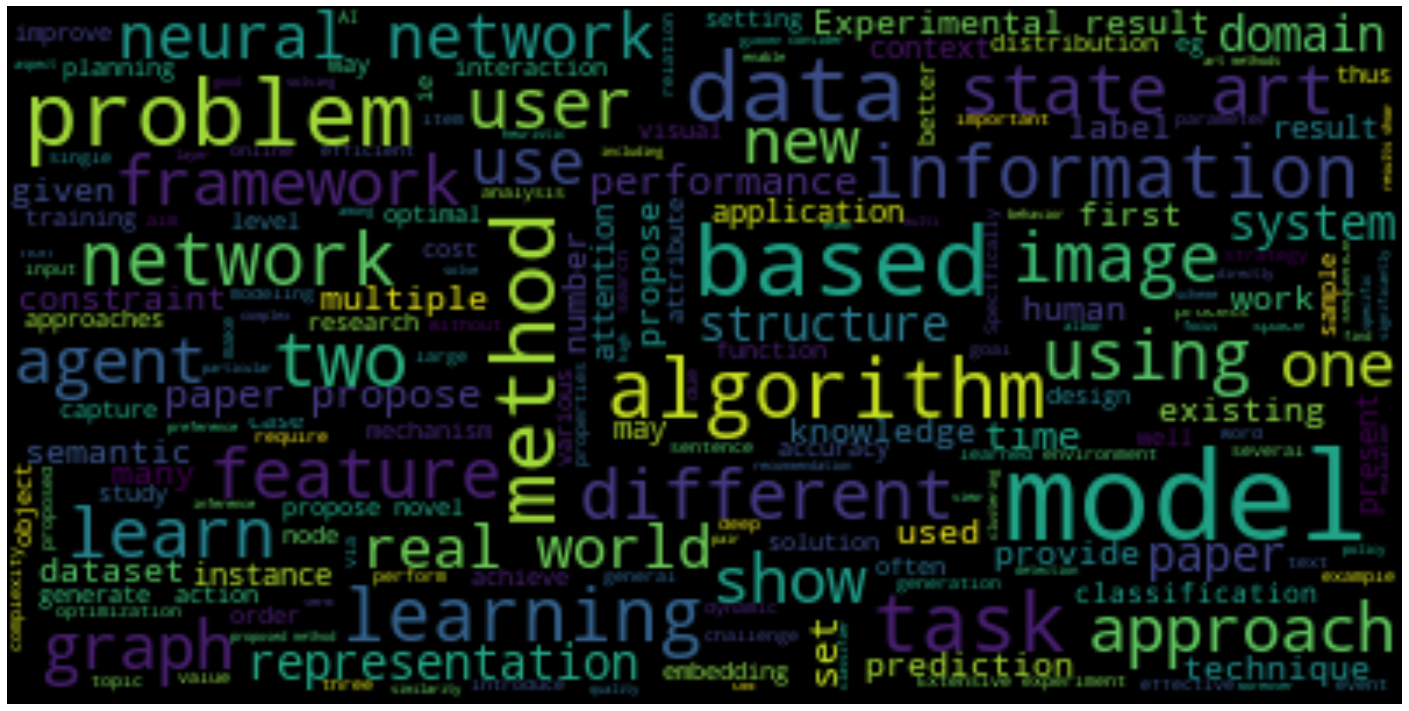

In [27]:
text = ''
for i in range(0, len(IJCAI2018papers)) :
  abstract = IJCAI2018papers[i]['abstract']
  if (isinstance(abstract, str)) :
    # remove punctuation and newline characters
    text += re.sub('[.\\n,]', '', abstract) + ' '
  else:
    print("No abstract found for index: ", i)
wcloud(text, 35)

## IJCAI 2018 Topic Word Cloud

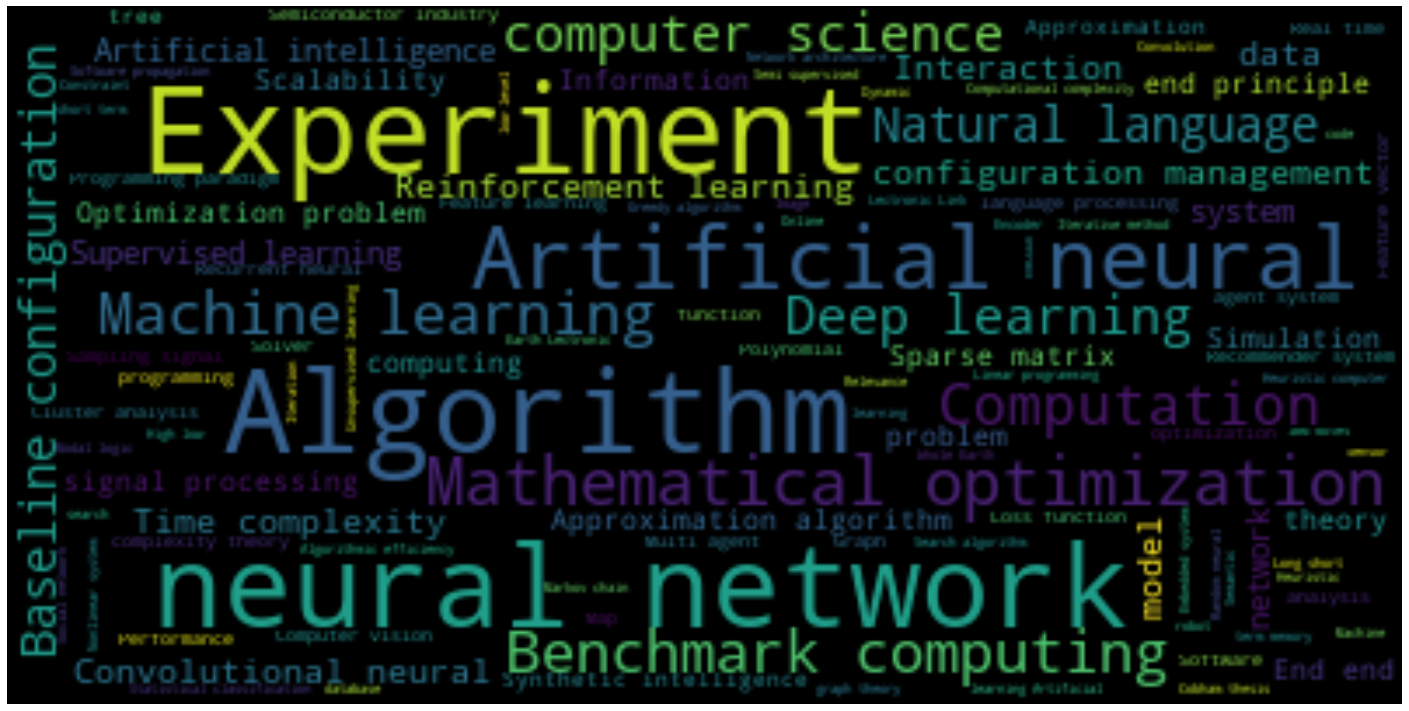

In [28]:
text = ''
key = 'topics'
for i in range(0, len(IJCAI2018papers)) :
    topics = IJCAI2018papers[i][key]
    for dct in topics :
        text += dct['topic'] + ' '
topics_text = text
wcloud(topics_text, 35)

## IJCAI 2018 Fields of Study  Word Cloud

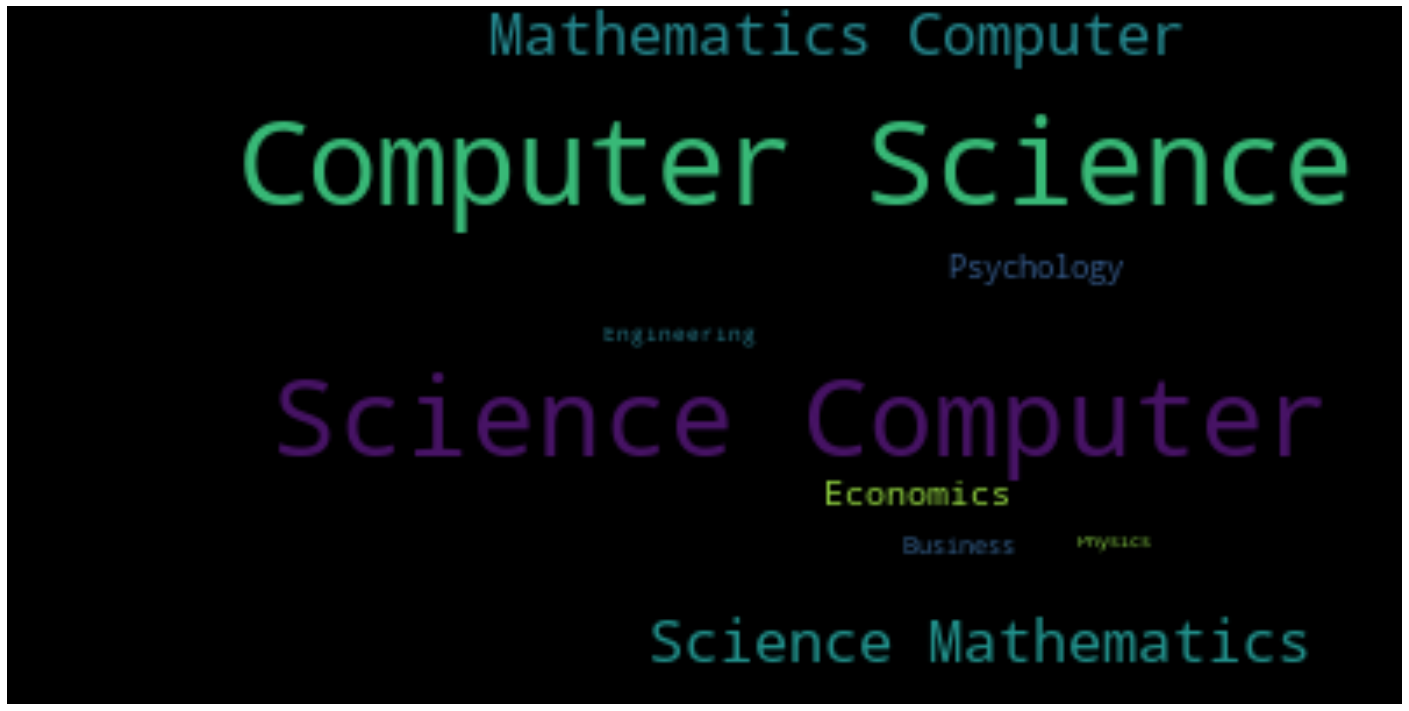

In [29]:
# fieldsOfStudy
text = ''
key = 'fieldsOfStudy'
for i in range(0, len(IJCAI2018papers)) :
    items = IJCAI2018papers[i][key]
    for item in items :
        text += item + ' '
fieldsOfStudy = text
wcloud(fieldsOfStudy, 35)